# 机器学习 作业一
+  姓名：刘天宇
+  班级：计算机科学18
+  学号：2018312387

## this homework use these packages
+ ### `matplotlib`
***

In [2]:
import matplotlib.pyplot as plt

## section 1, get the data
***

In [3]:
# input data manually
data = [
    (1, 'p', 0.9),
    (2, 'p', 0.8),
    (3, 'n', 0.7),
    (4, 'p', 0.6),
    (5, 'p', 0.55),
    (6, 'p', 0.54),
    (7, 'n', 0.53),
    (8, 'n', 0.52),
    (9, 'p', 0.51),
    (10, 'n', 0.505),
    (11, 'p', 0.4),
    (12, 'n', 0.39),
    (13, 'p', 0.38),
    (14, 'n', 0.37),
    (15, 'n', 0.36),
    (16, 'n', 0.35),
    (17, 'p', 0.34),
    (18, 'n', 0.33),
    (19, 'p', 0.3),
    (20, 'n', 0,1)
    ]

## section 2, define a function to help produce the figure
******

In [4]:
def bottomLine(lines):
    """
    find bottom line of lines
    line : pointStart:(x1,y1)
           pointEnd:(x2,y2)
    return: some points on the bottom line, used to plot the bottom line
    """
    def getLineEquation(point1, point2):
        """
        given two points, compute the weight and the bias of the line
        """
        x1, y1 = point1
        x2, y2 = point2
        a = (y1-y2)/(x1-x2)
        b = (x1*y2-x2*y1)/(x1-x2)
        return a,b
    
    x = [i*0.01 for i in range(101)]
    y = []
    
    for i in x:
        c = []
        
        for line in lines:
            point1, point2 = line
            a, b = getLineEquation(point1, point2)
            c.append(a * i + b)
        
        y.append(min(c))
    
    return x, y

## section 3, the main function
***

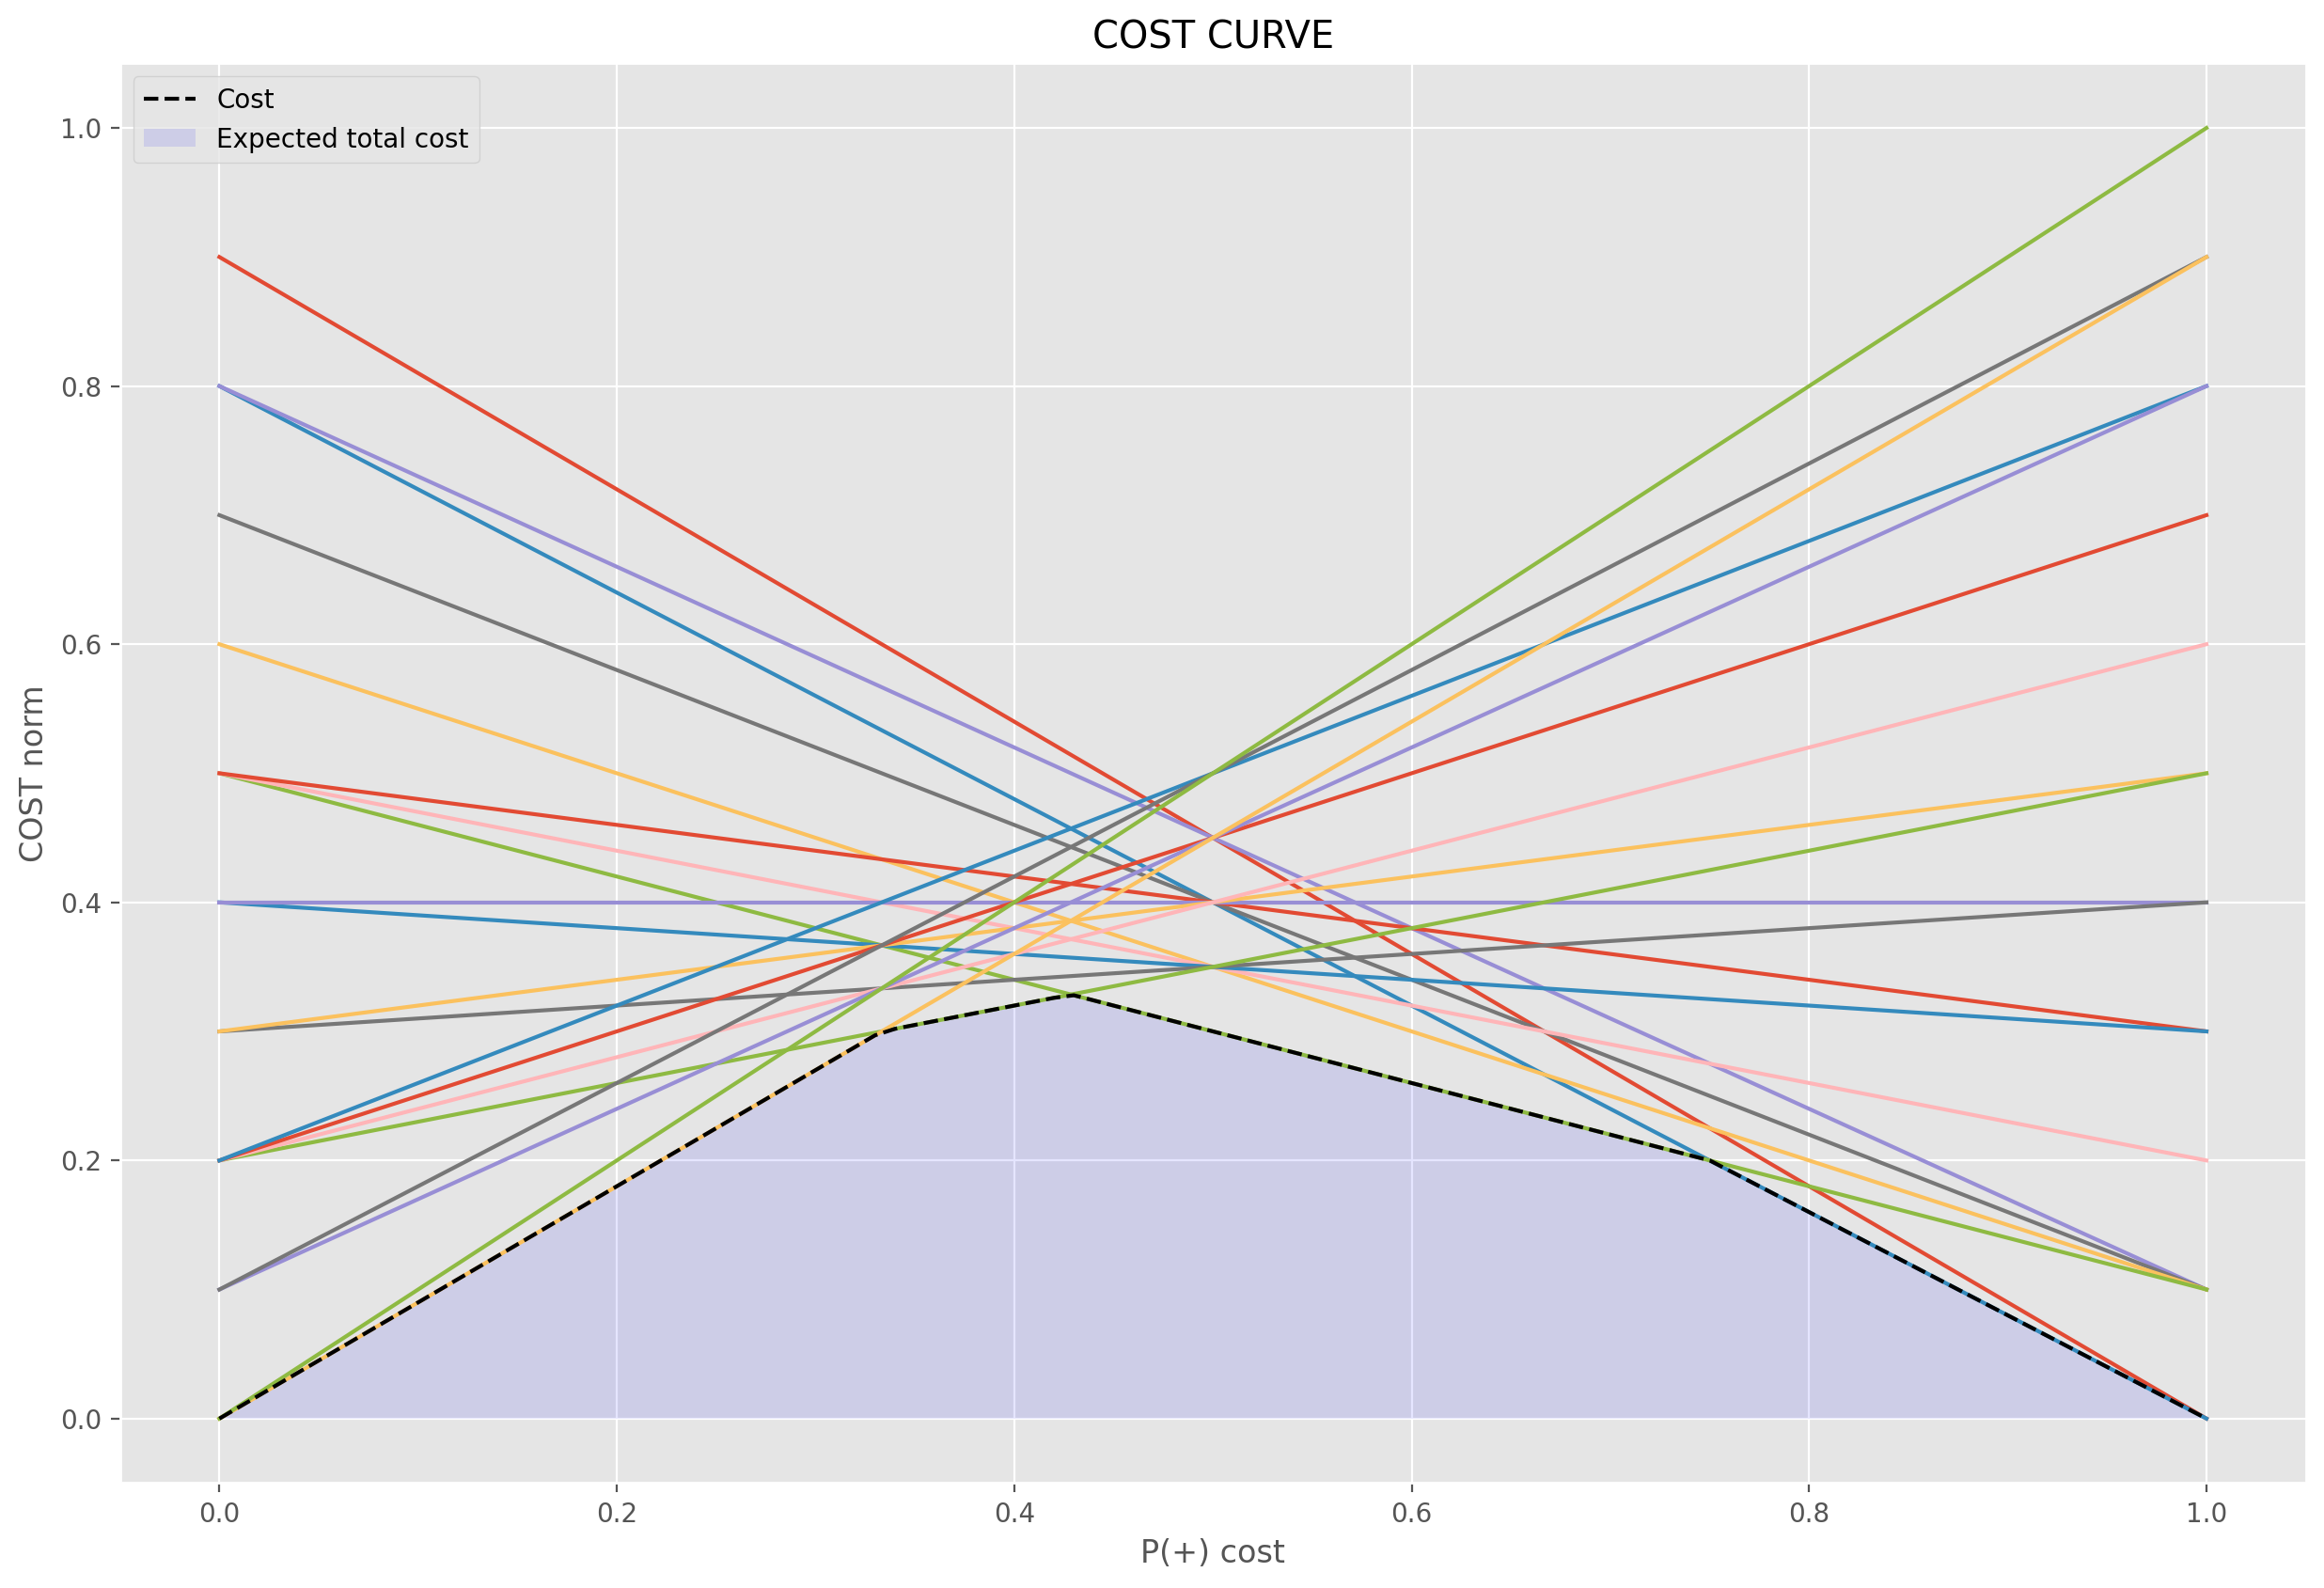

In [6]:
def drawCurve(data, curve='PR'):
    """
    this function draws the PR and ROC curve of the data
    data: input data object (list) with tuples (id, class, prob)
    curve: curve type used to draw curve ('PR' , 'ROC' or 'COST')
    """
    # sort the data with descending order
    data = sorted(data, key=lambda x:-x[2])
    
    # init P and R
    P, R, TPR, FPR =[], [], [], []
    
    # read the threshold
    ceita = [i[2] for i in data]
    idx = 0
    
    # compute total num of positive and negative items
    P_num = sum([1 if i[1]=='p'else 0 for i in data])
    N_num = len(data)-P_num
    
    while idx<len(ceita):
        # initialize the confusion matrix
        confusion_matrix = [[0, 0], [0, 0]]
        for i, item in enumerate(data):
            # judge item
            if item[1] == 'p':
                if item[2] >= ceita[idx]:
                    # TP item
                    confusion_matrix[0][0] += 1
                else:
                    # FN item
                    confusion_matrix[0][1] += 1
            else:
                if item[2] >= ceita[idx]:
                    # FP item
                    confusion_matrix[1][0] += 1
                else:
                    # TN item
                    confusion_matrix[1][1] += 1
        
        precision = confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0])
        recall = confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][1])
        tpr = confusion_matrix[0][0]/P_num
        fpr = confusion_matrix[1][0]/N_num
        
        R.append(recall)
        P.append(precision)
        TPR.append(tpr)
        FPR.append(fpr)
        idx += 1
    
    # draw the curve
    plt.style.use('ggplot')  # use ggplot style
    plt.figure(figsize=(15,10), dpi=150)  # adjust figsize
    
    if curve == 'PR':
        plt.plot(R, P, label='PR curve')
        plt.legend()
        plt.title('PR CURVE')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.show()
    
    if curve == 'ROC':
        plt.plot(FPR, TPR, label='ROC curve')
        plt.legend()
        plt.title('ROC CURVE')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()
    
    if curve == 'COST':
        FNR = [1-i for i in TPR]
        # save points to draw cost line
        lines = []
        for i in range(len(FNR)):
            plt.plot([0,1], [FNR[i], FPR[i]])
            lines.append(((0, FNR[i]), (1, FPR[i])))
        
        x, y = bottomLine(lines)  # get the bottom line of lines
        plt.plot(x, y, color='black', linestyle='--', label='Cost')
        plt.fill_between(x, y, facecolor='blue', alpha=.1, label='Expected total cost')
        
        plt.legend()
        plt.title('COST CURVE')
        plt.xlabel('P(+) cost')
        plt.ylabel('COST norm')
        plt.show()

        
if __name__ == '__main__':       
    
    # drawCurve(data, 'PR')
    # drawCurve(data, 'ROC')
    drawCurve(data, 'COST')